In [3]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
import sys
import scipy.io as sio
import h5py


sys.path.append('/mlodata1/lugeon/eeg_dream/scripts')
from training.dataset import datasets

sns.set_context("paper")
sns.set(font_scale = 1.6)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

/mlodata1/lugeon/miniconda3/envs/eeg-dream-conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
def get_sample(hdf5_file, batch_ix, sample_ix):

    dataset = datasets.EEG_Image_Batch_Dataset(hdf5_file, 
                                               window=10, 
                                               slide=5, 
                                               batch_size=128, 
                                               shuffle=False, 
                                               return_metadata=False,
                                               exclude_subject=[],
                                               output_type='none')

    batch = dataset.__getitem__(batch_ix)[0]
    sample = batch[9, :]
    
    return sample

In [25]:
n_electrodes = [256, 133, 87, 36, 14, 2]

sample_ix = 9
batch_ix = 0

samples = []
for e in n_electrodes:
    hdf5_file = f'/mlodata1/lugeon/dream_data/processed/madison_nrem_binary/dataset_{e}e.h5'
    samples.append(get_sample(hdf5_file, batch_ix, sample_ix))

In [26]:
samples[0].shape

(10, 5, 32, 32)

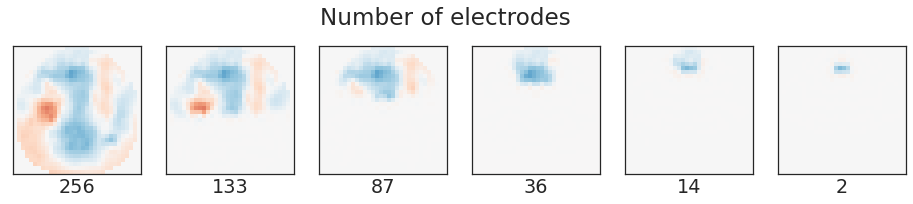

In [43]:
channel = 4
time = 5

fig, axes = plt.subplots(1, 6, figsize=(16, 3))

for i, sample in enumerate(samples):
    axes[i].imshow(sample[time, channel, :, :],  cmap='RdBu', vmin=-2, vmax=2)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel(n_electrodes[i])
    
fig.suptitle('Number of electrodes')
        
plt.savefig('img/masked_electrodes_signal.pdf', bbox_inches='tight')
plt.show()